In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cv2.imread("/content/drive/MyDrive/Colab Notebooks/Project/basedata/train/AT")

In [ ]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale = 1/255)


In [ ]:
training_dataset = train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Project/basedata/train", target_size= (200,200) , batch_size = 3 )
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Project/basedata/validation", target_size= (200,200) , batch_size = 3)

Found 62 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
training_dataset.class_indices

{'AT': 0, 'BDT': 1}

In [ ]:
training_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu' , input_shape = (200,200,3)) ,
                                    tf.keras.layers.MaxPool2D(2,2) ,
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512 ,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001) , 
              metrics =['accuracy'])

In [ ]:
model_fit = model.fit(training_dataset , 
                      steps_per_epoch = 4,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
4/4 [==============================] - 4s 1s/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 4s 1s/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
4/4 [==============================] - 3s 725ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/30
4/4 [==============================] - 3s 703ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/30
4/4 [==============================] - 3s 734ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/30
4/4 [==============================] - 3s 720ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/30
4/4 [==============================] - 3s 747ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/30
4/4 [==========

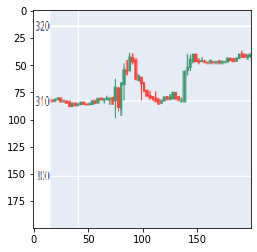

No Pattern


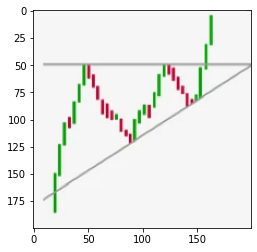

No Pattern


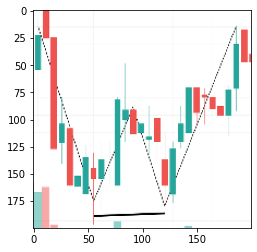

No Pattern


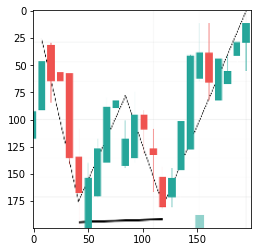

No Pattern


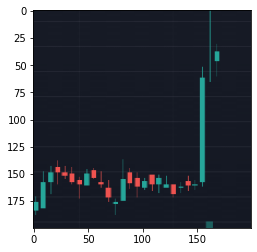

No Pattern


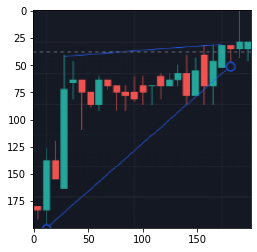

No Pattern


In [ ]:
dir_path = "/content/drive/MyDrive/Colab Notebooks/Project/basedata/test"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if (val != 1 and val != 0) :
        print("No Pattern")
    if val == 0 :
        print(" Ascending Triangle")
    if val == 1 :
        print("Bullish Double top")
    
    